#### Autoregression

A regression model, such as linear regression, models an output value based on a linear combination of input values

$\hat{y} = b_0 + b_1*X_1 $

Where $\hat{y}$ is the prediction, $b_0$ and $b_1$ are coefficients found by optimizing the model on training data, and X is an input value.

we can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as follows:

$X_{t+1} = b_0 + b_1*X_{t-1} + b_2*X_{t-2}$

__Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).__

- An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

- This relationship between variables is called correlation.

- If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. 

- If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

- We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

- Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

- The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

- Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

from pandas import DataFrame
from statsmodels.tsa.ar_model import AR
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

from pandas import Series
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

In [177]:
location = "E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\daily-minimum-temperatures-in-me.csv"

In [178]:
# load the training data from breast cancer data set
df = pd.read_csv(location)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [180]:
series = pd.Series.from_csv(location)

print(series.head())


Date          Temp
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
dtype: object


In [181]:
series.Temp

AttributeError: 'Series' object has no attribute 'Temp'

In [182]:
# check for ? marks
series[(series == '?')]

Series([], dtype: object)

In [183]:
# drop nulls
series.dropna(axis=0, inplace=True)

In [184]:
series.shape

(3651,)

In [185]:
# convert from object to float
# series = series.astype('float64', errors = 'ignore')
series = pd.to_numeric(series, errors='coerce')
series.dtypes

dtype('float64')

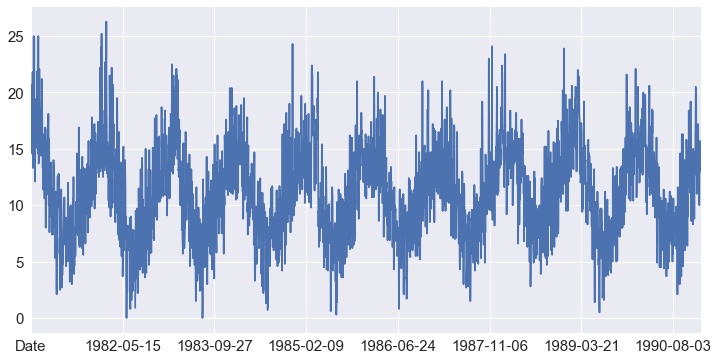

In [187]:
plt.figure(figsize=(12, 6))
series.plot();


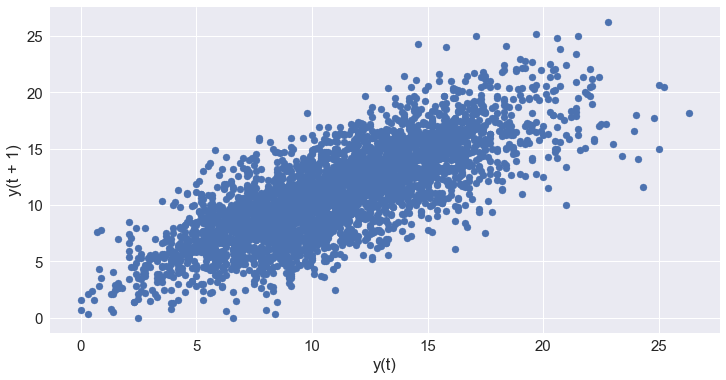

In [188]:
# plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) 
# as a scatter plot.

# Pandas provides a built-in plot to do exactly this, called the lag_plot() function.
plt.figure(figsize=(12,6))
lag_plot(series)
pyplot.show()


We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

This process could be repeated for any other lagged observation, such as if we wanted to review the relationship with the last 7 days or with the same day last month or last year.

> We can use a statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high values above 0.5 or below -0.5 showing high correlation.

> Correlation can be calculated easily using the corr() function on the DataFrame of the lagged dataset.

In [189]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

result = dataframe.corr()
print(result)

        t-1     t+1
t-1  1.0000  0.7731
t+1  0.7731  1.0000


This is good for one-off checks, but tedious if we want to check a large number of lag variables in our time series.

#### Autocorrelation Plots

> - Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. 
> - If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 
> - If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 
> - The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. 

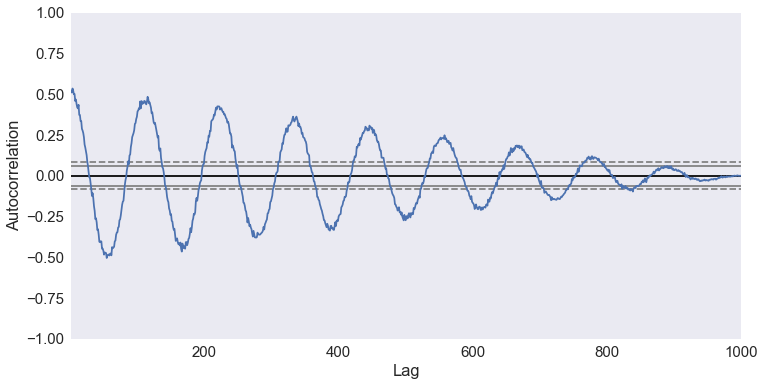

In [190]:
data = pd.Series(0.7 * np.random.rand(1000) + \
                      0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
 
plt.figure(figsize=(12,6))
autocorrelation_plot(data);

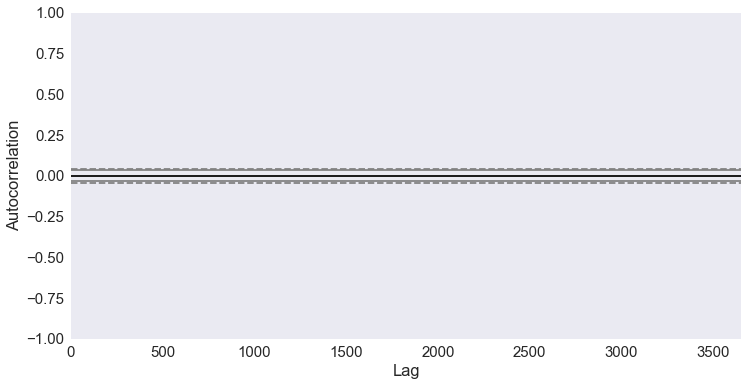

In [191]:
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(12,6))
autocorrelation_plot(series);


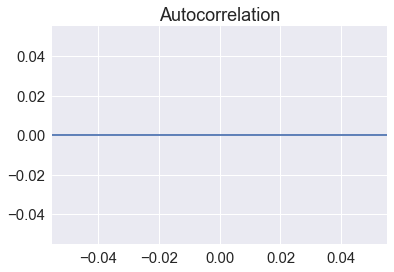

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()

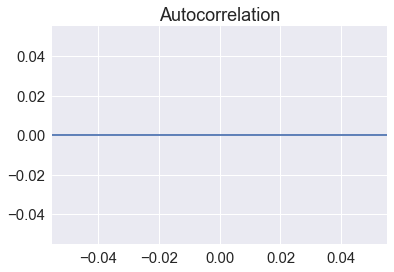

In [158]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,6))

plot_acf(series, lags=50)
pyplot.show()

#### Persistence Model

In [56]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']


In [57]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 

In [58]:
# persistence model
def model_persistence(x):
    return x

Test MSE: 3.423


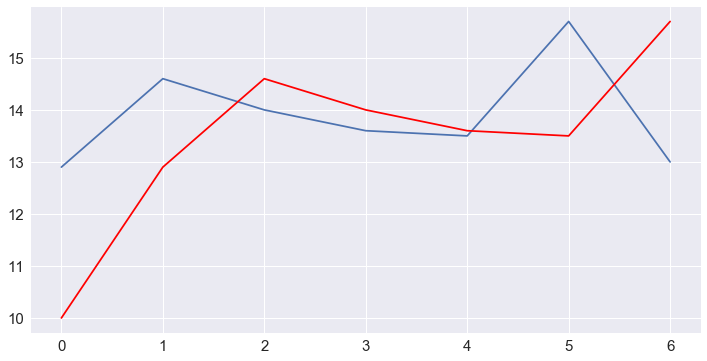

In [60]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
test_score = mean_squared_error(test_y, predictions)

print('Test MSE: %.3f' % test_score)

# plot predictions vs expected
plt.figure(figsize=(12,6))
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

The expected values for the next 7 days are plotted (blue) compared to the predictions from the model (red).

#### Autoregression Model

An autoregression model is a linear regression model that uses lagged variables as input variables.

the statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class



In [79]:
series = series.dropna()

In [80]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [81]:
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 29
Coefficients: [ 0.55974632  0.58709415 -0.09246698  0.05085627  0.03908131  0.04156931
  0.02416716  0.04398952  0.01499416  0.03491271  0.00079989  0.00560537
  0.01592083  0.02563525  0.0019312   0.0257546   0.00842032  0.0099442
  0.03284872 -0.00944755  0.02473185  0.01840579  0.01422356 -0.01669205
 -0.00127444  0.01253475  0.0206685   0.01062753  0.00137506  0.00296821]


In [82]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=11.897334, expected=12.900000
predicted=13.065633, expected=14.600000
predicted=13.542059, expected=14.000000
predicted=13.282815, expected=13.600000
predicted=13.118024, expected=13.500000
predicted=13.152012, expected=15.700000
predicted=13.157325, expected=13.000000
Test MSE: 1.476


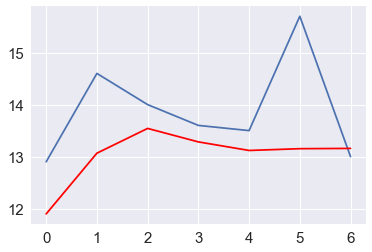

In [83]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()